In [1]:
#self written libraries
from model_builder import ModelBuild
from data_prep import DataPrep

In [2]:
#other libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_location = "./data/compas-scores-two-years.csv"
compas_score_full = pd.read_csv(data_location)
data_prepper = DataPrep(compas_score_full)
X, y = data_prepper.get()
X_cols = X.columns
X = X.to_numpy()
y = y.to_numpy()

Accuracy: 0.6820987654320988


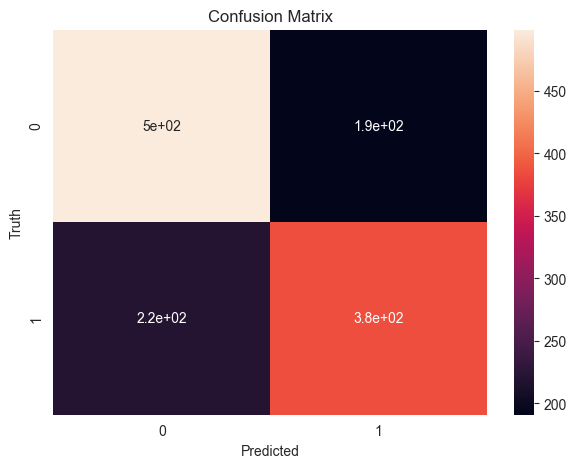

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=32, shuffle=True)
modelBuilder = ModelBuild('DecisionTree')
model, accuracy, cm = modelBuilder.train_eval(X_train, y_train, X_test, y_test)

print(f"Accuracy: {accuracy}")
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [5]:
from sklearn import tree
explainer_lime = modelBuilder.decision_tree_explain(X_train, X_cols)

#instance to explain (for easy column viewing converted to pandas)
print(f"Instance to be explained:\n{pd.DataFrame(X_test, columns=X_cols).iloc[0]}")

print(f"Instance to be explained as list: {X_test[0]}")
exp_inst = explainer_lime.explain_instance(X_test[0], model.predict_proba, num_features=5)
tree.plot_tree(exp_inst)

Instance to be explained:
days_in_jail          30.0
age                   22.0
decile_score           9.0
priors_count           2.0
c_days_from_compas     0.0
is_violent_recid       0.0
v_decile_score        10.0
Name: 0, dtype: float64
Instance to be explained as list: [30. 22.  9.  2.  0.  0. 10.]
None
DecisionTreeRegressor(max_depth=3, max_leaf_nodes=8,
                      random_state=RandomState(MT19937) at 0x1A1C3F52840)
[0.66146474 0.16958893 0.15078902 0.         0.01815732]


AttributeError: 'DecisionTreeRegressor' object has no attribute 'intercept_'